# Iris Dataset Clustering

### Importing Modules

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_palette('bright')
from sklearn.cluster import KMeans

### Loading and Visualizing Data 

In [2]:
df = pd.read_csv('./datasets/Iris.csv', index_col="Id")
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [27]:
X_df = df.drop('Species', axis=1)

print('X shape: ', X_df.shape)
print('No of Entries', X_df.shape[0])


X shape:  (150, 4)
No of Entries 150


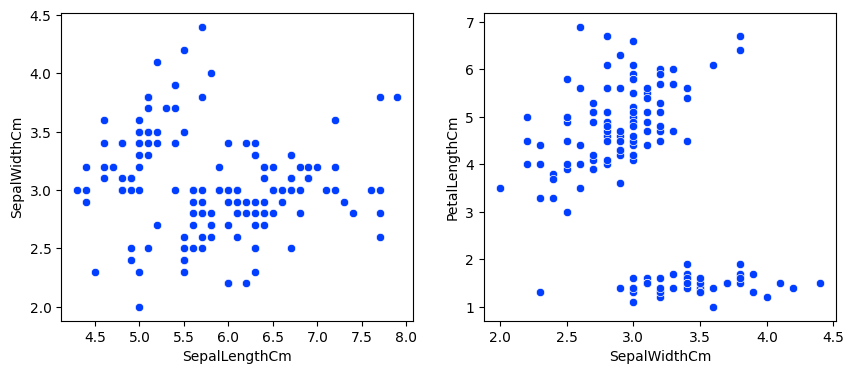

In [90]:
plt.figure(figsize=(10,4))
plt.subplot(121)
sns.scatterplot(x=X_df.iloc[:, 0], y=X_df.iloc[:, 1])
plt.subplot(122)
sns.scatterplot(x=X_df.iloc[:, 1], y=X_df.iloc[:, 2])
plt.show()

### Training

In [65]:
ex_model = KMeans(n_init = 'auto' ,n_clusters=2)
pred = ex_model.fit_predict(X_df.values)

### Visualizing Clusters Prediction

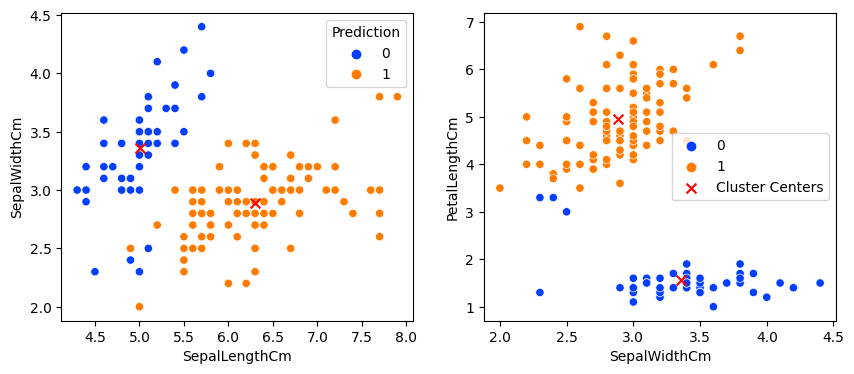

In [91]:
plot_df = X_df.copy(deep = True)
plot_df['Prediction'] = pred

def plot_cluster(model, df):
    plt.figure(figsize=(10,4))
    plt.subplot(121)
    sns.scatterplot(
        x='SepalLengthCm',
        y='SepalWidthCm',
        hue='Prediction',
        data=df,
        palette='bright'
    )
    
    
    # Cluster Center
    plt.scatter(
        model.cluster_centers_[:, 0], 
        model.cluster_centers_[:, 1], 
        c='r', 
        marker='x', 
        s=50, 
        label='Cluster Centers'
    )
    plt.subplot(122)
    sns.scatterplot(
        x='SepalWidthCm',
        y='PetalLengthCm',
        hue='Prediction',
        data=df,
        palette='bright'
    )
    plt.scatter(
        model.cluster_centers_[:, 1], 
        model.cluster_centers_[:, 2], 
        c='r', 
        marker='x', 
        s=50, 
        label='Cluster Centers'
    )
    
    
    plt.legend()
    plt.show()
    
plot_cluster(ex_model, plot_df)

### Finding Optimal Number of Clusters

##### Defining Score Metric 

In [67]:
inertiae = []
MAX_K = 5
K = range(2, MAX_K+1)
for i in K:
    model = KMeans(n_clusters = i, init='random', n_init='auto')
    model.fit(X_df.values)
    inertiae.append(model.inertia_)


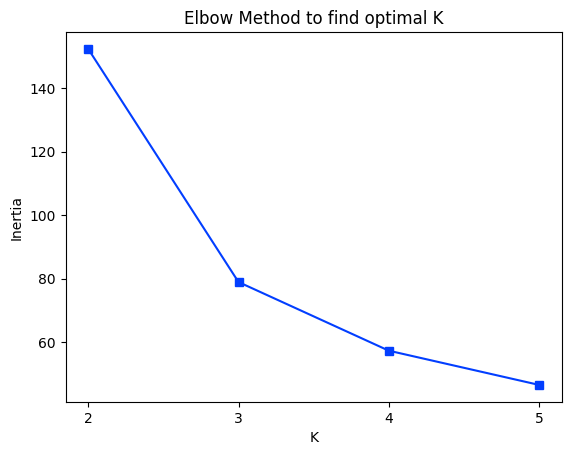

In [68]:
plt.plot(K, inertiae, marker='s')
plt.xlabel('K')
plt.xticks(K)
plt.ylabel('Inertia')
plt.title('Elbow Method to find optimal K')
plt.show()

### Conclusion
From the graph figure above, it is known that there are 3 distinct clusters in the data.

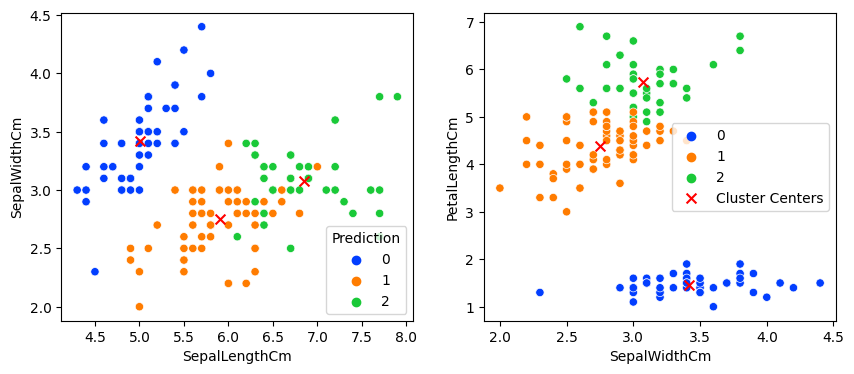

In [92]:
best_model = KMeans(n_clusters=3, n_init='auto', init='random')
plot_df['Prediction'] = best_model.fit_predict(X_df.values)

plot_cluster(best_model, plot_df)